In [1]:
%load_ext autoreload

import kwant
import numpy as np
import matplotlib.pyplot as plt 
import kwant.continuum
import scipy.sparse.linalg as sla
import tinyarray as tiny
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 

%matplotlib widget
mpl.rcParams.update({'font.size': 20, 'text.usetex': True,  'font.family': 'serif', 'font.serif': ['Computer Modern']})

sx = tiny.array([[0 , 1] , [1 , 0]])
sy = tiny.array([[0 , -1j] , [1j , 0]])
sz = tiny.array([[1 , 0] , [0 , -1]])


I = tiny.array([[1 , 0] , [0 , 1]])
t_plus = 0.5*(np.kron(sx , I) + 1j*np.kron(sy , I))
t_minus = t_plus.T
phs = np.kron(sy , sy)

from dataclasses import dataclass
import RGF_single_orbital as so
import RGFtools as rg
@dataclass
class JosephsonParameters:
    W : float
    L : float
    t: float
    flux : float
    energy: float
    Delta: float
    phase: float
    mu: float
    tol: float
    a: float
from scipy.linalg import orth

/Users/krishnanganesh/anaconda3/lib/python3.8/site-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [2]:
# params = JosephsonParameters(W = 5 , 
#                              L = 10,
#                              t = 1,
#                              flux = 0,
#                              energy = 1j*0.01*((2*0) + 1),
#                              Delta = 2,
#                              phase = 2*np.pi*(0.5),
#                              mu = 0.5,
#                              a = 1,
#                             tol = 1e-4)

In [3]:
# lead_indices = [0 , params.L +1]
# G_r_nn , G_r_end_n , hams = rg.RGF_left_sweep(lead_indices , params)
# G_nn , G_nplus_n , G_n_nplus = rg.greens_for_current(params , 2)

In [8]:
# Temperature:
temp = 0.1
#Matusbara frequencies:
cutoff = 100
omega_n = (2*np.linspace(-cutoff , cutoff , 2*cutoff + 1) + 1)*np.pi*temp

# Josephson phase differences in units of 2\pi:
phases = np.linspace(0 , 1 , 21)

#x-index at which we evaluate the current:
n = 2

# Array for storing currents:
I_phi = np.zeros(len(phases) , dtype = np.complex128)

# Matsubara sum convergence test:
matsu = np.zeros(shape = (omega_n.shape[0] , phases.shape[0]) , dtype = np.complex128)

# # For testing modified matsubara sum:
# omega_n_modified = (2*np.linspace(0 , cutoff , cutoff + 1) + 1)*np.pi*temp
# I_phi_modified = np.zeros(len(phases) , dtype = np.complex128)
# matsu_modified = np.zeros_like(matsu)

from tqdm import tqdm

# Computing Matusbara sum:
for i in tqdm(range(len(phases))):
    j = 0
    for w_n in omega_n:
        params_local = JosephsonParameters(W = 5 , 
                             L = 2,
                             t = 1,
                             flux = 0.0,
                             energy = 1j*w_n,
                             Delta = 5,
                             phase = 2*np.pi*(phases[i]),
                             mu = 0.0,
                             a = 1,
                            tol = 1e-4)
        
        # Greens functions:
        G_nn , G_nplus_n , G_n_nplus = rg.greens_for_current(params_local , n)
        # Trace equation for current flowing across cut: 
        I_phi[i] += -1j*temp*np.trace(G_nplus_n - G_n_nplus)
        matsu[j , i] = -1j*temp*np.trace(G_nplus_n - G_n_nplus)

        # Modified matsubara sum:
        # I_phi_modified[i] += 2*temp*1j*np.real(np.trace(G_nplus_n - G_n_nplus))
        # matsu_modified[j , i] = 2*temp*1j*np.real(np.trace(G_nplus_n - G_n_nplus))
        j += 1


100%|██████████| 21/21 [00:55<00:00,  2.65s/it]


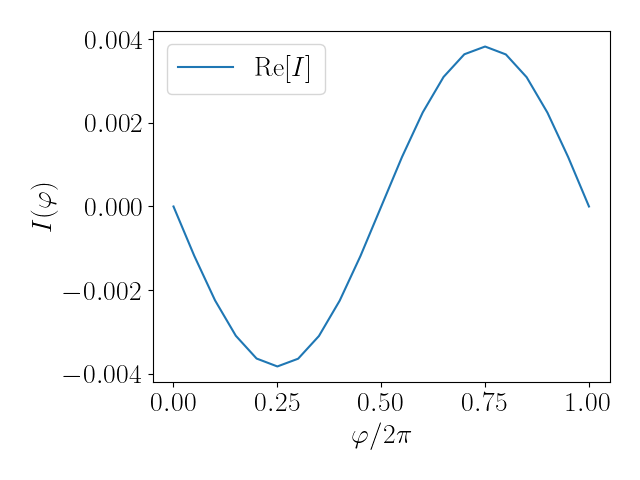

In [9]:
plt.figure()
plt.plot(phases, I_phi.real , label = r'Re$[I]$')
# plt.scatter(phases, -np.max(I_phi.real)*np.sin(phases*2*np.pi) , color = 'r' , label = r'$I_{C}\sin(\varphi)$')
plt.xlabel(r'$\varphi / 2\pi$')
plt.ylabel(r'$I(\varphi)$')
plt.legend()
plt.tight_layout()

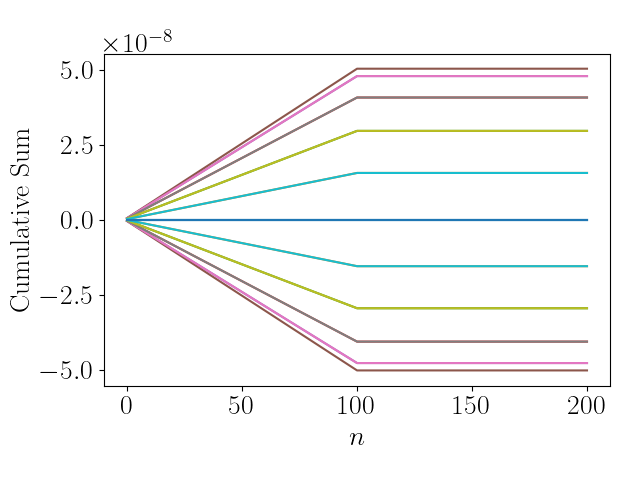

In [10]:
# Convergence testing:
cumulative_sum_matsubara = np.cumsum(matsu , axis = 0)
plt.figure()
for i in range(phases.shape[0]):
    plt.plot(cumulative_sum_matsubara[: , i])

plt.xlabel(r'$n$')
plt.ylabel(r'Cumulative Sum')
plt.tight_layout()

In [3]:
np.linspace(0 , 10 , 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])